This notebook is just for showcasing. The heavy lifting is in the referenced python files, which are attached

### Loading and testing

Let's load the files.

The projections have already been tested, so let's try running RRR on a small, 5 vertex graph.

In [1]:
from RRR import *
from rankProject import *
from cliqueProject import *

n = 5

H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]])

A = semiDefProject(np.random.rand(n, n))

print A

[[ 0.74898253  0.68560315  0.53026984  0.53143793  0.60668445]
 [ 0.68560315  0.88109344  0.30792235  0.46922854  0.44142195]
 [ 0.53026984  0.30792235  0.28376392  0.47602041  0.26655964]
 [ 0.53143793  0.46922854  0.47602041  0.47692332  0.20668791]
 [ 0.60668445  0.44142195  0.26655964  0.20668791  0.44009071]]


Let's try $k = 3$, which should yield a clique.

In [2]:
k = 3

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

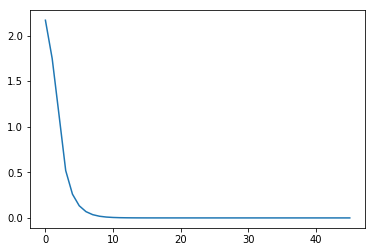

In [3]:
plt.plot(errors)
plt.show()


In [4]:
print extractClique(sols)

#print sols
#print H
#print eig(sols)[0]


#print eig(rankProject(Y, 1, False))[0]

#print np.round(rankProject(Y, 1, False), 4)
#print np.round(cliqueProject(Y, 3, H), 4)

[0 1 2]


As desired, the algorithm quickly found the correct solution.

If we set $k$ too high, of course, it will just thrash.

In [5]:
k = 4

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

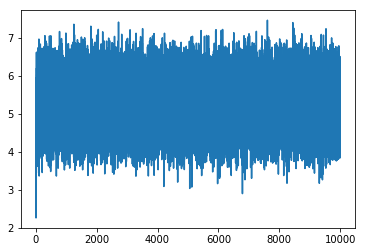

In [6]:
plt.plot(errors)
plt.show()



However, if we do have a $4$ clique, everything works out again:

In [7]:
H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0]])

k = 4

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

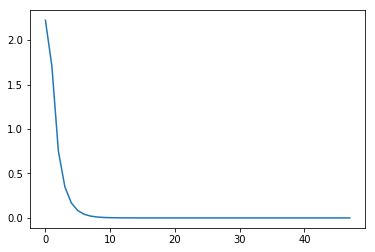

[0 1 2 3]


In [8]:
plt.plot(errors)
plt.show()

print extractClique(sols)

Fantastic! On to the real problem, which takes more than $40$ iterations.

### Loading the data, and running the code again.

First, we will load the data. Then, we will start experimenting, looking for good values of $k$.

In [9]:
n = 125

from graphReader import getGraph
H = getGraph()

print H.shape
print H[-1]

(125, 125)
[ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]


Let's first be modest an set $k = 5$.

In [10]:
k = 5

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

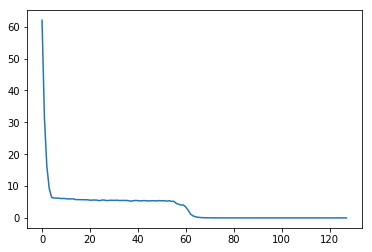

[  0   9  15 104 123]


In [12]:
plt.plot(errors)
plt.show()
#print np.sum(np.round(cliqueProject(Y, k, H), 8))

print extractClique(sols)


But is this clique unique? Let's find out by running the algorithm with a different seed.

In [13]:
A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

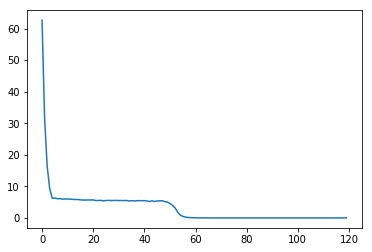

[ 3 38 40 45 52]


In [14]:
plt.plot(errors)
plt.show()
print extractClique(sols)

Clearly not.

Let's set more ambitious targets for $k$. The data file said that the edge probability is $0.9$

That means that the probability of set of size $k$ to be a clique is 
$$
P_{c} = 0.9^{k(k-1)/2},
$$
so the total expected number of such cliques is
$$
N_c = {125\choose k}0.9^{k(k-1)/2} ~ 
$$

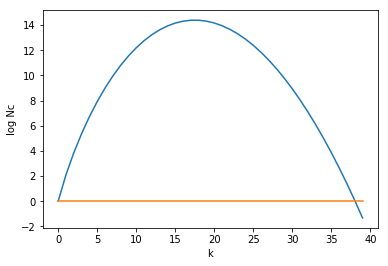

In [21]:
from scipy.special import binom
import math

def Nc(k):
    return binom(125, k)*(0.9**(k*(k-1)*0.5))

ks = range(40)
Ns = [Nc(k) for k in ks]
lNs = [math.log(N)/math.log(10) for N in Ns]
plt.plot(ks, lNs)
plt.plot(ks, [0 for k in ks])
plt.xlabel("k")
plt.ylabel("log Nc")
plt.show()

Here are some values of $N_c$ for $k$ in the high 30s:
$$
\begin{matrix}
36 && 460 \\
37 && 25 \\
38 && 1.2 \\
39 && 0.05
\end{matrix}
$$

Note that $N_c$ comes with high variance bars. Therefore, it is reasonable to expect a max clique somewhere in the high 30s.

Let's start with something less ambitious: $k = 20$, which nearly maximizes $N_c$:

In [16]:
k = 20

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

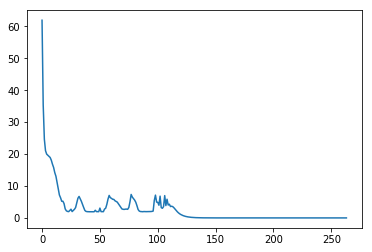

[  3   7   9  10  18  27  35  36  38  45  48  66  69  73  88 103 113 115
 118 119]


In [22]:
plt.plot(errors)
plt.show()
print extractClique(sols)

But is it unique?

In [25]:
k = 20

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

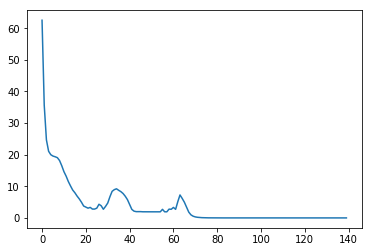

[  8   9  12  20  22  36  44  48  50  51  55  57  66  76  78  95  98 103
 113 116]


In [26]:
plt.plot(errors)
plt.show()
print extractClique(sols)


Clearly not, as is expected.

## Excursion for k=33.

Let's push the envelope a little. There should be a million cliques of size $k = 33$; let's find one.

In [28]:
k = 33

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000000000, True)

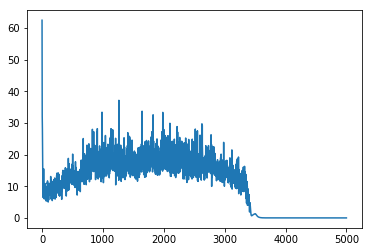

[  6   7  10  18  21  24  33  44  45  47  48  53  55  64  66  67  69  70
  73  76  78  79  81  84  95  97 101 103 113 115 116 121 124]


In [32]:
plt.plot(errors[:5000])
plt.show()
print extractClique(sols)


It seems we've found a solution! It didn't take too many iterations, either.

Just in case, let's verify it. We should see a "1" printed if the set is a clique.

In [30]:
def verifyClique(c, H):
    r = 1
    for i in range(len(c)):
        for j in range(i+ 1, len(c)):
            r = r*H[c[i], c[j]]
    return r

print verifyClique(extractClique(sols), H)
        

1.0


Fantastic.

I wonder, does a smaller beta have better performance?

In [34]:
k = 33

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.01, 1e-12, 1000, True)

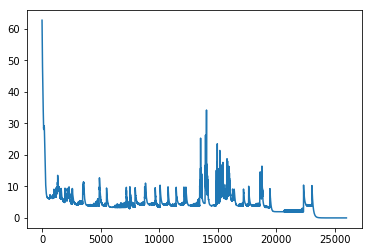

In [44]:
plt.plot(errors)
plt.show()

In [43]:
while(True):
    Y, errors2, sols = RRR(Y,
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.01, 1e-12, 1000, True)
    errors += errors2
    if errors[-1] < 1e-4:
        print "Close!"
    if errors[-1] <= 1e-12:
        break



Close!
Close!


KeyboardInterrupt: 

It's worth nothing that closeups of the error profile reveal strange plateaus, as if the projections are often a set distance apart. Could these be smaller cliques? Or ranks $2$, $3$, etc.?

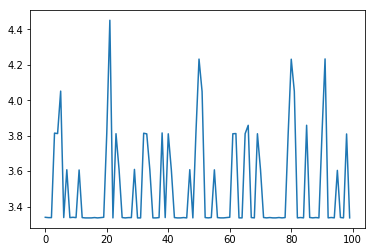

In [48]:
plt.plot(errors[6400:6500])
plt.show()

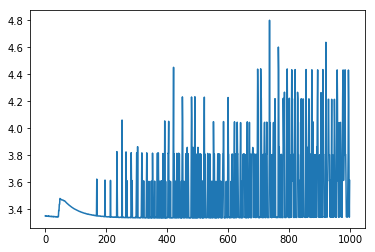

In [49]:
plt.plot(errors[6000:7000])
plt.show()

In [50]:
print extractClique(sols)
print verifyClique(extractClique(sols), H)


[  4   6   8  10  16  18  24  28  30  33  43  51  54  65  66  69  76  78
  79  81  84  90  92  95  97 102 103 109 113 116 120 121 124]
1.0


I think I will use a smaller beta.
Even though it took a lot more steps, it only took a factor of $5$ more, while we reduced step size by a factor of $50$.

Now, let's look for truly difficult cliques.

## k = 35

There should be $7000$ cliques at $k = 35$. Let's find them.

In [51]:
k = 35

A = semiDefProject(np.random.rand(n, n))

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.01, 1e-12, 1000, True)

In [97]:
while(True):
    Y, errors2, sols = RRR(Y,
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.01, 1e-12, 1000, True)
    errors += errors2
    if errors[-1] < 1e-4:
        break



KeyboardInterrupt: 

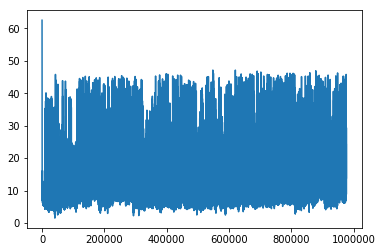

In [98]:
plt.plot(errors)
plt.show()

In [99]:
print errors[-1]

13.8930809964


How much harder is this than $k=34$, anyway?

In [96]:
print Nc(34)
print Nc(35)
print 0.9**70

100851.385037
7292.90465632
0.000626578748218


Somewhere between $2000$ times harder and $20$ times harder. It's probably closer to $2000$ because 'fake attractors' keep distracting the algorithm.

Nothing to do but to keep running.

### Conclusion

$k=35$ did not converge after a full nightl; clearly I need better code.

Howevere, the other notebook did compute a clique at $k=34$.

That is the largest my code can detect at this stage.